<a href="https://colab.research.google.com/github/mchirico/zcovid/blob/mmc/Zoe_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19**

Note:  You need to make a copy of this note book, if you want to run it yourself
by clicking on "File/Save a copy in Drive"











Data From: 
[JHU CSSE](https://github.com/CSSEGISandData/COVID-19)

[NYT](https://github.com/nytimes/covid-19-data/)



In [ ]:
import requests
import pandas as pd
import numpy as np 
from datetime import datetime



import warnings
warnings.filterwarnings("ignore")

try:
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  sns.set(style="white", color_codes=True)
  from matplotlib_venn import venn2
  import pydot
  import libarchive
  import torch
except:
  print("Will try to install software")
  # Lines below .... Only need to be run once at the top of the notebook.
  !pip install -q matplotlib-venn
  # #   https://pypi.python.org/pypi/pydot
  !apt-get -qq install -y graphviz && pip install -q pydot
  !apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
  !pip install -U -q PyDrive
  !pip install --upgrade -q gspread
  
  !pip install torchvision
  
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  sns.set(style="white", color_codes=True)
  from matplotlib_venn import venn2
  import pydot
  import libarchive





In [ ]:
TMP = '/tmp/data'

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
zipurl = 'https://ihmecovid19storage.blob.core.windows.net/latest/ihme-covid19.zip'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall(TMP)

In [ ]:
file = !find  /tmp/data -iname '*.csv'
#sdate = file[0][len(TMP)+1: len(TMP)+11]
#startDate = datetime.strptime(sdate,'%Y_%m_%d')
#startDate
file

['/tmp/data/2020_10_29/worse_hospitalization_all_locs.csv',
 '/tmp/data/2020_10_29/Summary_stats_all_locs.csv',
 '/tmp/data/2020_10_29/reference_hospitalization_all_locs.csv',
 '/tmp/data/2020_10_29/best_masks_hospitalization_all_locs.csv']

In [ ]:
file

['/tmp/data/2020_10_29/worse_hospitalization_all_locs.csv',
 '/tmp/data/2020_10_29/Summary_stats_all_locs.csv',
 '/tmp/data/2020_10_29/reference_hospitalization_all_locs.csv',
 '/tmp/data/2020_10_29/best_masks_hospitalization_all_locs.csv']

In [ ]:
for f in file:
  if 'Worse_hospitalization_all_locs.csv' in f:
    file_hospital = f
  if 'Summary' in f:
    file_summary = f


In [ ]:
url='https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv'
nyt=pd.read_csv(url)


In [ ]:
nyt.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


# Reading Johns Hopkins

#### Read in Confirmed Cases

In [ ]:
# 
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
d=pd.read_csv(url)
d.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1805,1818,1828,1831,1839,1852,1863,1882,1898,1905,1911,1924,1928,1949,1966,1983,1989,1999,2010,2021,2023,2030,2048,2059,2074,2082,2103,2126,2141,2159,2173,2186,2197,2212,2230,2242,2267,2283,2304,2328
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6024,6048,6073,6085,6116,6134,6141,6172,6190,6203,6220,6248,6270,6285,6333,6350,6369,6375,6405,6443,6475,6615,6637,6658,6694,6712,6743,6768,6888,6940,6966,6985,6995,7061,7097,7134,7188,7226,7263,7348
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,902,921,921,921,923,927,927,939,942,942,944,951,950,965,968,977,981,981,988,996,997,1012,1031,1033,1033,1042,1045,1055,1056,1060,1061,1065,1074,1079,1080,1090,1092,1095,1098,1107
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,675,678,686,687,691,703,708,719,726,736,738,744,744,761,771,775,785,789,791,801,811,825,828,840,843,850,856,861,866,873,878,883,890,897,907,917,924,926,932,948
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1642,1655,1656,1662,1665,1673,1681,1689,1704,1713,1722,1742,1750,1768,1783,1807,1827,1838,1848,1873,1893,1911,1925,1932,1942,1972,1988,2009,2039,2074,2095,2108,2162,2188,2222,2253,2286,2297,2335,2378


In [ ]:
PERIODS = 7

c=d
cols = d.columns[10:11].tolist() + d.columns[11::].tolist()
cols
c=c[cols]
c=c.set_index('Combined_Key')
x=c.diff(axis=1,periods=PERIODS)
x=x.reset_index()
c=c.diff(axis=1)

c=c.reset_index()
c

,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20
0,"Autauga, Alabama, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,13.0,10.0,3.0,8.0,13.0,11.0,19.0,16.0,7.0,6.0,13.0,4.0,21.0,17.0,17.0,6.0,10.0,11.0,11.0,2.0,7.0,18.0,11.0,15.0,8.0,21.0,23.0,15.0,18.0,14.0,13.0,11.0,15.0,18.0,12.0,25.0,16.0,21.0,24.0
1,"Baldwin, Alabama, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,24.0,25.0,12.0,31.0,18.0,7.0,31.0,18.0,13.0,17.0,28.0,22.0,15.0,48.0,17.0,19.0,6.0,30.0,38.0,32.0,140.0,22.0,21.0,36.0,18.0,31.0,25.0,120.0,52.0,26.0,19.0,10.0,66.0,36.0,37.0,54.0,38.0,37.0,85.0
2,"Barbour, Alabama, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,19.0,0.0,0.0,2.0,4.0,0.0,12.0,3.0,0.0,2.0,7.0,-1.0,15.0,3.0,9.0,4.0,0.0,7.0,8.0,1.0,15.0,19.0,2.0,0.0,9.0,3.0,10.0,1.0,4.0,1.0,4.0,9.0,5.0,1.0,10.0,2.0,3.0,3.0,9.0
3,"Bibb, Alabama, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,8.0,1.0,4.0,12.0,5.0,11.0,7.0,10.0,2.0,6.0,0.0,17.0,10.0,4.0,10.0,4.0,2.0,10.0,10.0,14.0,3.0,12.0,3.0,7.0,6.0,5.0,5.0,7.0,5.0,5.0,7.0,7.0,10.0,10.0,7.0,2.0,6.0,16.0
4,"Blount, Alabama, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,13.0,1.0,6.0,3.0,8.0,8.0,8.0,15.0,9.0,9.0,20.0,8.0,18.0,15.0,24.0,20.0,11.0,10.0,25.0,20.0,18.0,14.0,7.0,10.0,30.0,16.0,21.0,30.0,35.0,21.0,13.0,54.0,26.0,34.0,31.0,33.0,11.0,38.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,"Teton, Wyoming, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,5.0,14.0,9.0,4.0,4.0,12.0,11.0,2.0,4.0,13.0,4.0,7.0,1.0,5.0,0.0,8.0,11.0,5.0,-1.0,12.0,13.0,3.0,4.0,9.0,5.0,11.0,7.0,17.0,6.0,12.0,33.0,15.0,11.0,24.0,25.0,10.0,45.0,30.0,15.0
3336,"Uinta, Wyoming, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,5.0,3.0,0.0,5.0,5.0,1.0,1.0,1.0,3.0,1.0,3.0,4.0,9.0,0.0,2.0,1.0,3.0,3.0,15.0,3.0,3.0,11.0,9.0,11.0,7.0,10.0,5.0,4.0,4.0,18.0,8.0,11.0,13.0,2.0,7.0,17.0,46.0
3337,"Unassigned, Wyoming, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
3338,"Washakie, Wyoming, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
x.head()

,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20
0,"Autauga, Alabama, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,54.0,55.0,46.0,52.0,61.0,65.0,77.0,80.0,77.0,80.0,85.0,76.0,86.0,84.0,85.0,84.0,88.0,86.0,93.0,74.0,64.0,65.0,70.0,75.0,72.0,82.0,103.0,111.0,111.0,114.0,112.0,115.0,109.0,104.0,101.0,108.0,110.0,118.0,131.0
1,"Baldwin, Alabama, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,568.0,571.0,547.0,497.0,510.0,494.0,144.0,148.0,142.0,130.0,135.0,132.0,136.0,144.0,161.0,160.0,166.0,155.0,157.0,173.0,190.0,282.0,287.0,289.0,319.0,307.0,300.0,293.0,273.0,303.0,308.0,291.0,283.0,318.0,329.0,246.0,248.0,260.0,278.0,353.0
2,"Barbour, Alabama, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,39.0,36.0,35.0,37.0,31.0,29.0,37.0,21.0,21.0,23.0,28.0,23.0,38.0,29.0,35.0,39.0,37.0,37.0,46.0,32.0,44.0,54.0,52.0,52.0,54.0,49.0,58.0,44.0,29.0,28.0,32.0,32.0,34.0,25.0,34.0,32.0,34.0,33.0,33.0
3,"Bibb, Alabama, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,24.0,30.0,30.0,33.0,39.0,36.0,44.0,48.0,50.0,51.0,53.0,41.0,53.0,52.0,49.0,49.0,51.0,47.0,57.0,50.0,54.0,53.0,55.0,54.0,59.0,55.0,50.0,41.0,45.0,38.0,40.0,40.0,41.0,46.0,51.0,51.0,48.0,49.0,58.0
4,"Blount, Alabama, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34.0,44.0,39.0,44.0,44.0,44.0,47.0,47.0,49.0,57.0,60.0,77.0,77.0,87.0,94.0,103.0,114.0,116.0,106.0,123.0,125.0,128.0,118.0,105.0,104.0,124.0,115.0,116.0,128.0,149.0,163.0,166.0,190.0,200.0,213.0,214.0,212.0,202.0,227.0,216.0


In [ ]:
n=pd.melt(x, id_vars=['Combined_Key'], value_vars=x.columns[2::])
n.columns = ['Country/Region', 'timeStamp',  'value']
n['timeStamp'] = n['timeStamp'].apply(lambda x: datetime.strptime(x,'%m/%d/%y'))
n.head()

,Country/Region,timeStamp,value
0,"Autauga, Alabama, US",2020-01-23,NaN
1,"Baldwin, Alabama, US",2020-01-23,NaN
2,"Barbour, Alabama, US",2020-01-23,NaN
3,"Bibb, Alabama, US",2020-01-23,NaN
4,"Blount, Alabama, US",2020-01-23,NaN


## N is smoother

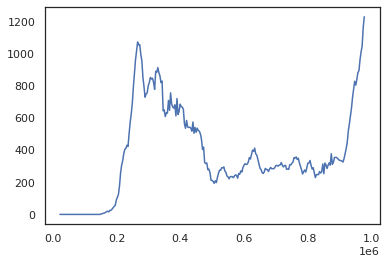

In [ ]:

regions = ['Montgomery, Pennsylvania, US']
for region in regions:
  z= n[n['Country/Region'].str.find(region,0)==0]
  z['value'].plot.line(x='timeStamp',y='value');

In [ ]:
m=pd.melt(c, id_vars=['Combined_Key'], value_vars=c.columns[2::])
m.columns = ['Country/Region', 'timeStamp',  'value']
m['timeStamp'] = m['timeStamp'].apply(lambda x: datetime.strptime(x,'%m/%d/%y'))
m.head()

,Country/Region,timeStamp,value
0,"Autauga, Alabama, US",2020-01-23,0.0
1,"Baldwin, Alabama, US",2020-01-23,0.0
2,"Barbour, Alabama, US",2020-01-23,0.0
3,"Bibb, Alabama, US",2020-01-23,0.0
4,"Blount, Alabama, US",2020-01-23,0.0


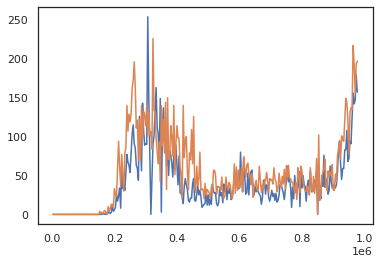

In [ ]:
regions = ['Bucks, Pennsylvania, US','Montgomery, Pennsylvania, US']
for region in regions:
  z= m[m['Country/Region'].str.find(region,0)==0]
  z['value'].plot.line();

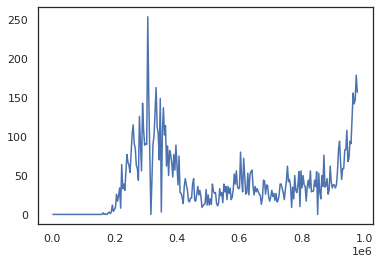

In [ ]:
regions = ['Bucks, Pennsylvania, US']
for region in regions:
  m[m['Country/Region'].str.find(region,0)==0]['value'].plot.line();

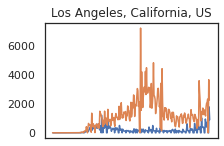

In [ ]:
regions = ['Philadelphia, Pennsylvania, US']
regions = ['Potter, Texas, US']
regions = ['Dallas, Texas, US']
#regions = ['New York City, New York, US']
regions = ['Los Angeles, California, US']
regions = ['Philadelphia, Pennsylvania, US','Los Angeles, California, US']
fig=plt.figure()
for region in regions:
  m[m['Country/Region'].str.find(region,0)==0]['value'].plot.line(title=region,xticks=[],ax=fig.add_axes((0.05,0.5,0.4,0.4)));
plt.show()

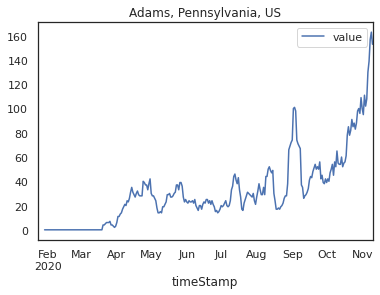

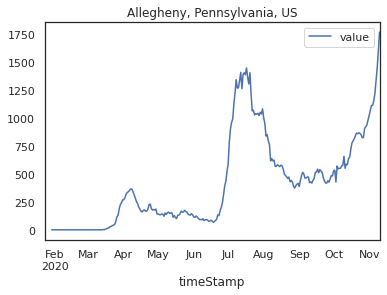

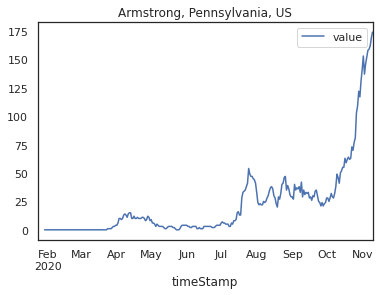

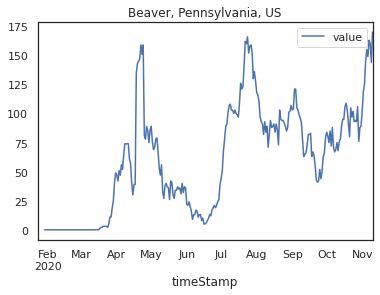

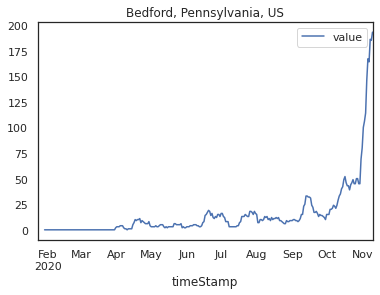

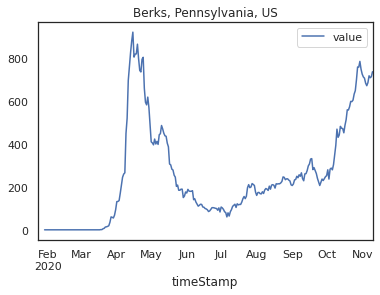

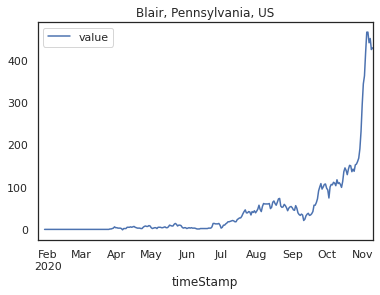

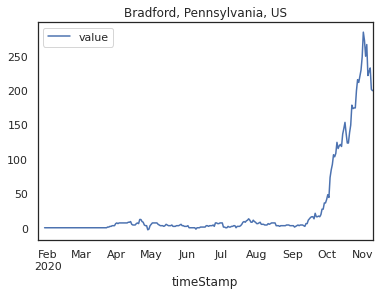

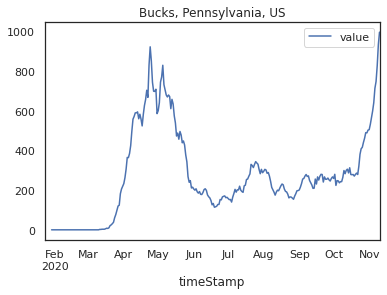

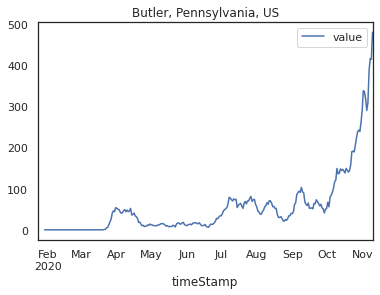

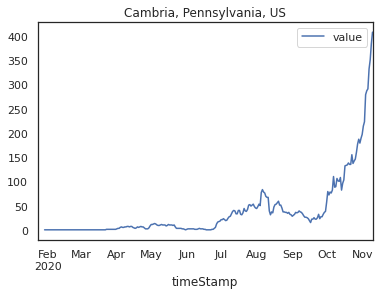

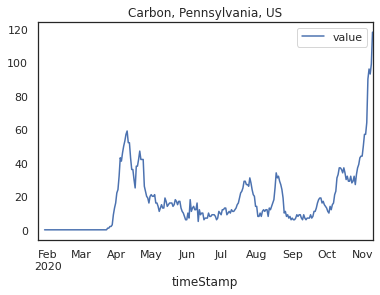

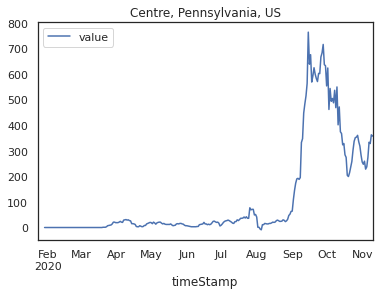

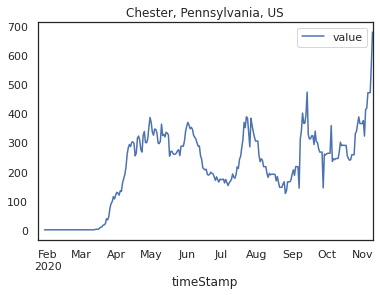

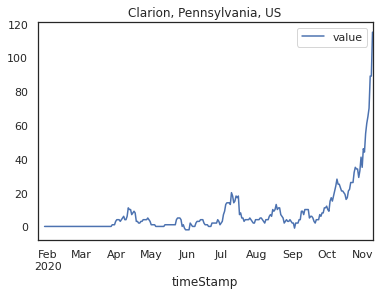

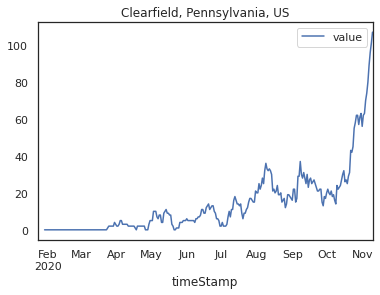

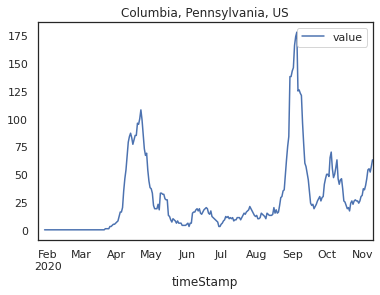

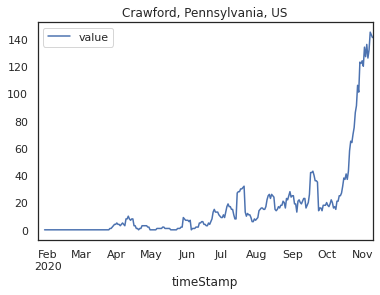

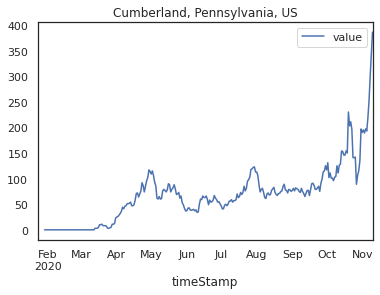

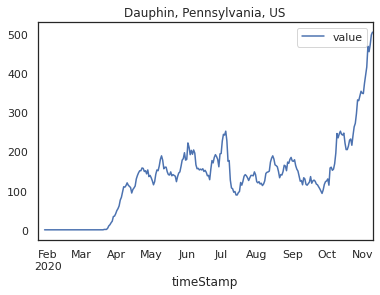

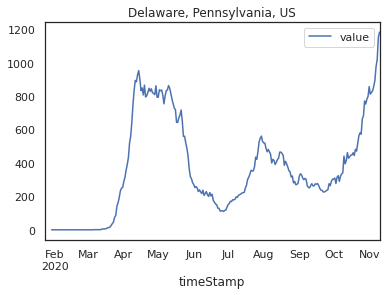

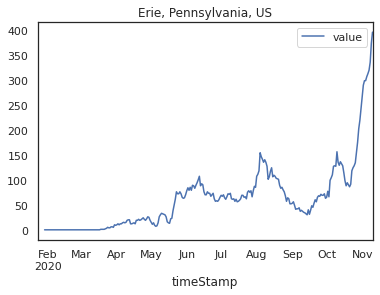

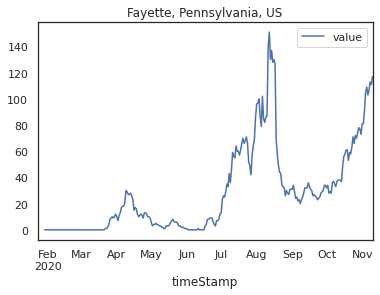

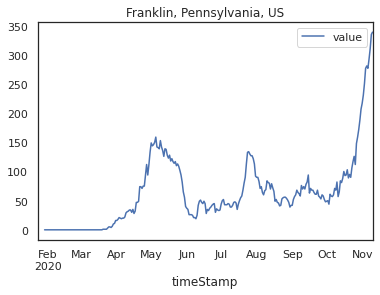

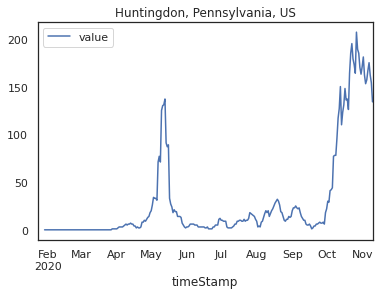

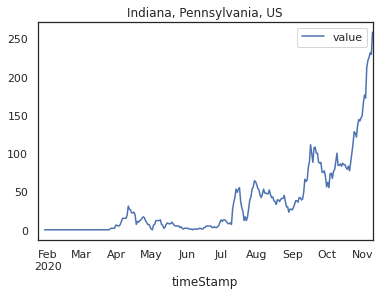

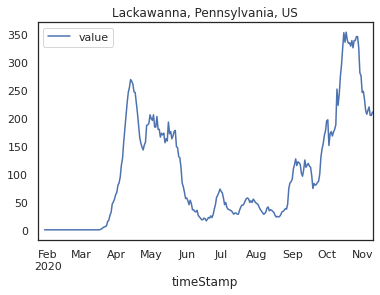

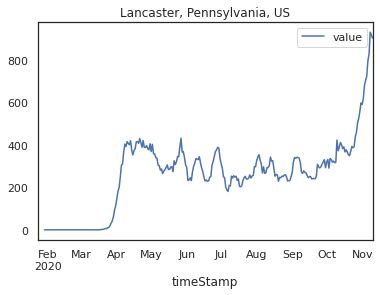

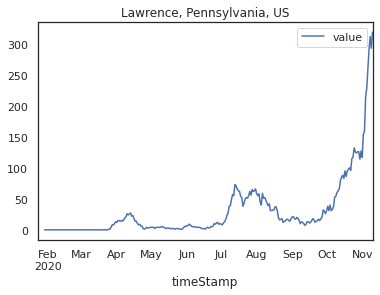

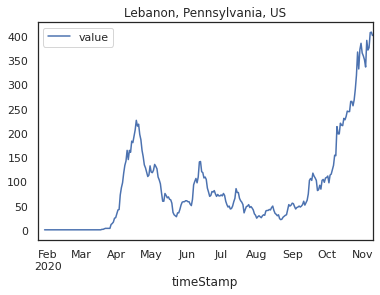

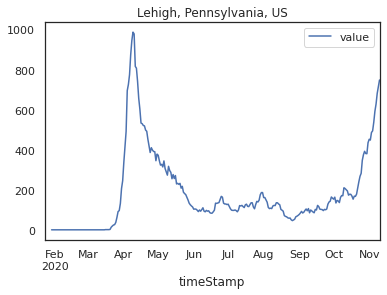

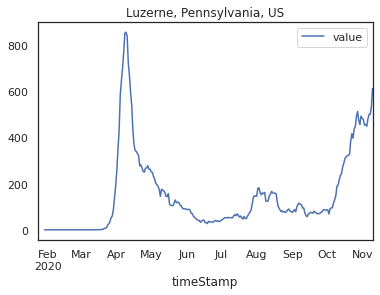

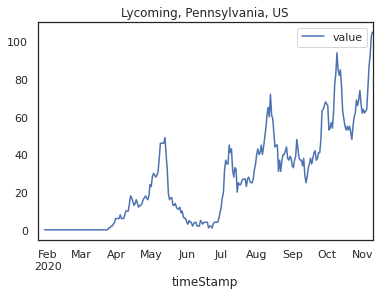

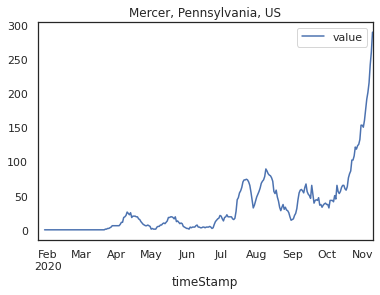

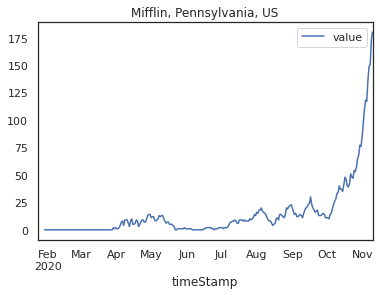

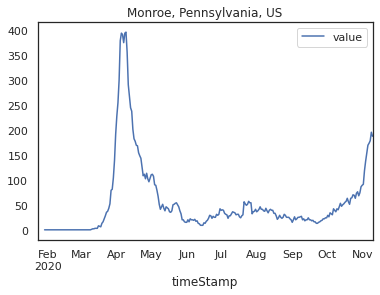

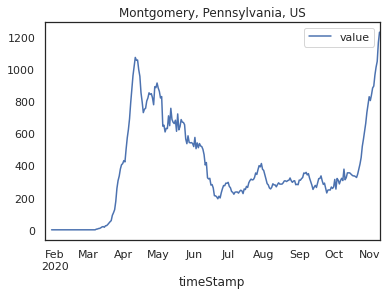

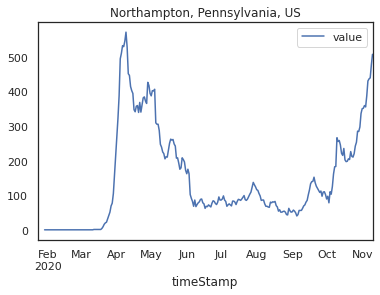

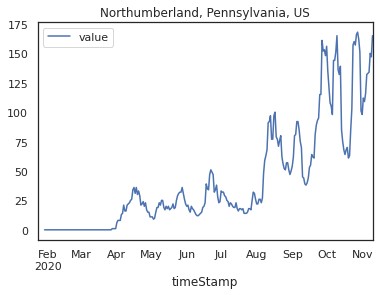

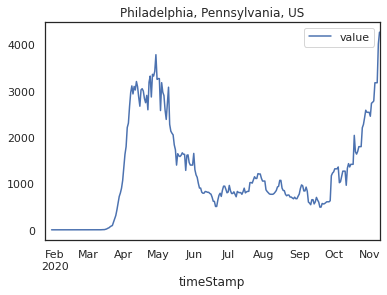

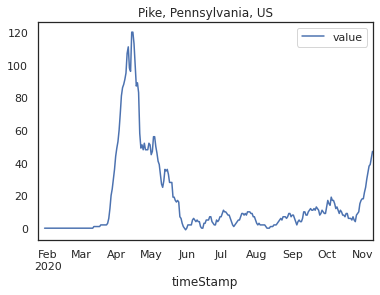

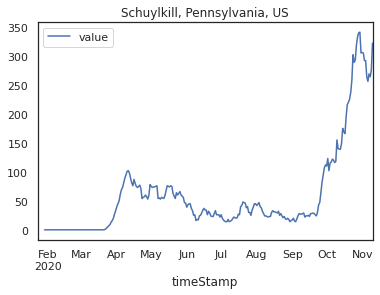

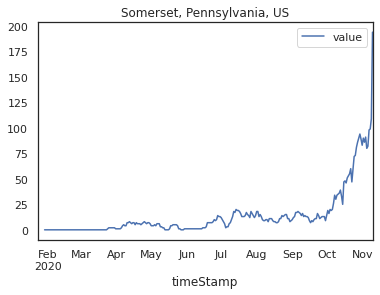

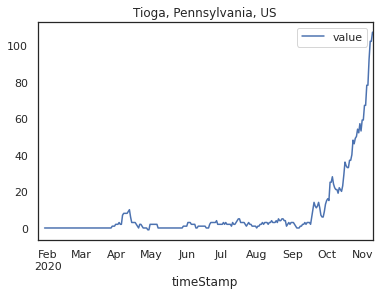

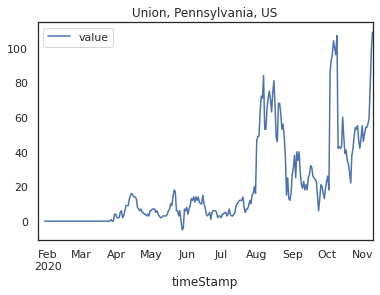

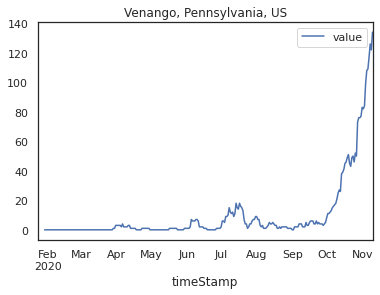

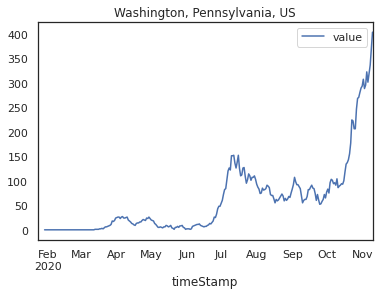

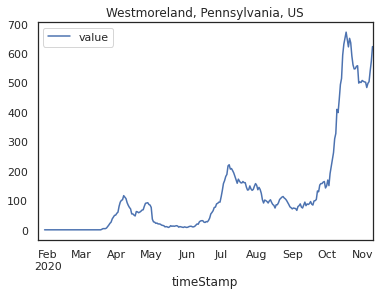

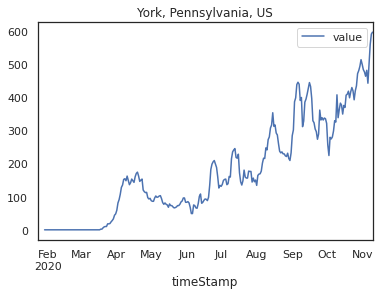

In [ ]:
import matplotlib.pyplot as plt


t = n[(n['Country/Region'].str.find('Pennsylvania',0)!= -1)]
my_list = t[t['value']>100]['Country/Region'].unique()
t=t[t['Country/Region'].isin(my_list)]

for title, group in t.groupby('Country/Region'):
  try:
    group.plot(x='timeStamp', y='value', title=title)
  except:
    print('title',title)

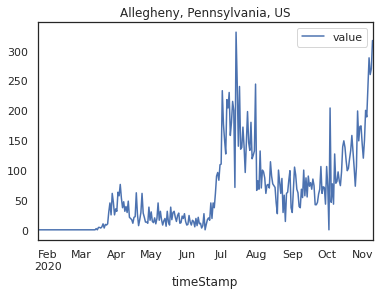

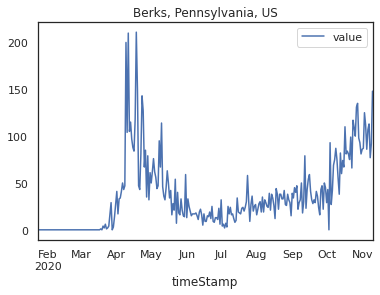

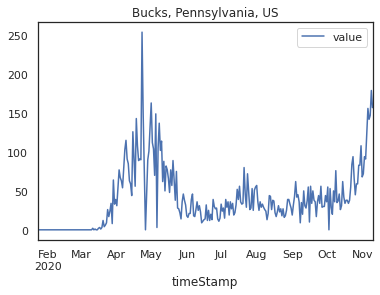

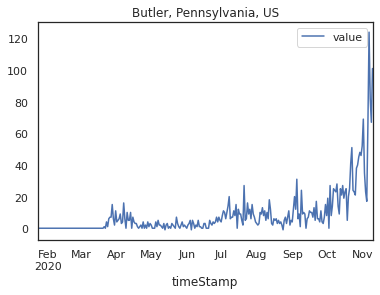

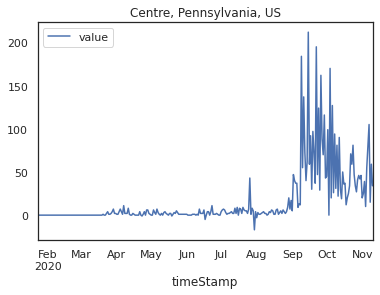

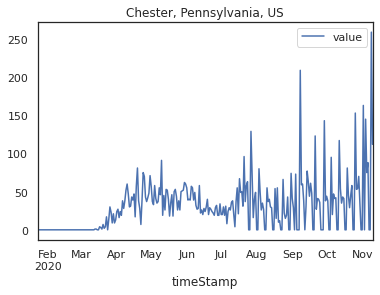

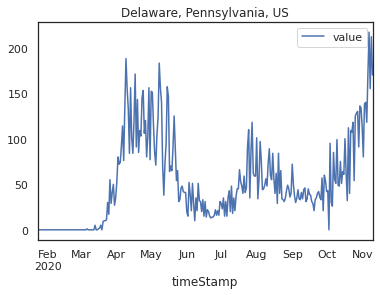

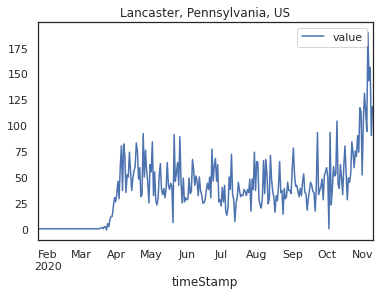

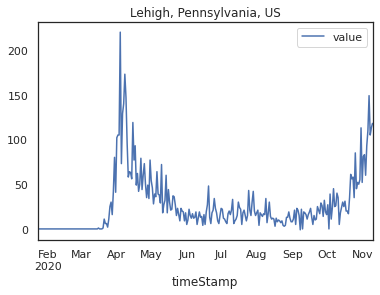

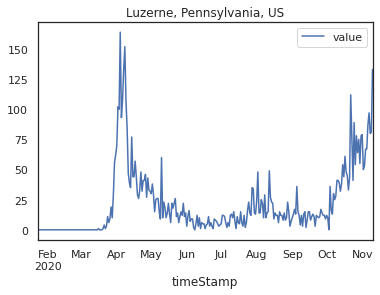

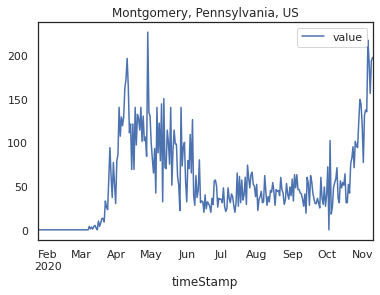

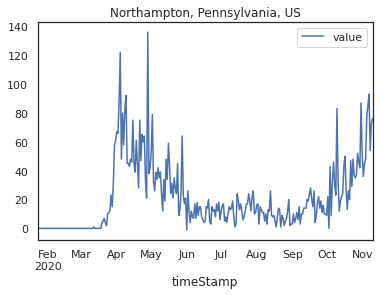

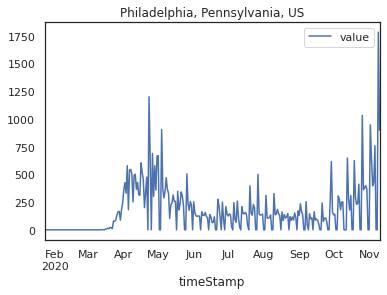

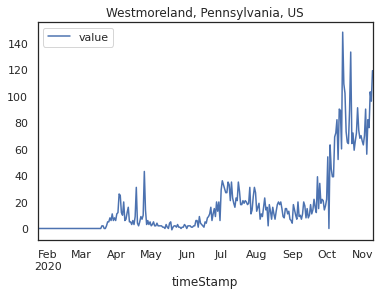

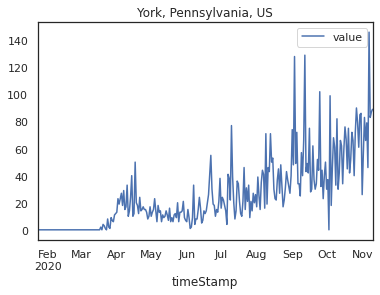

In [ ]:
import matplotlib.pyplot as plt


t = m[(m['Country/Region'].str.find('Pennsylvania',0)!= -1)]
my_list = t[t['value']>100]['Country/Region'].unique()
t=t[t['Country/Region'].isin(my_list)]

for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)

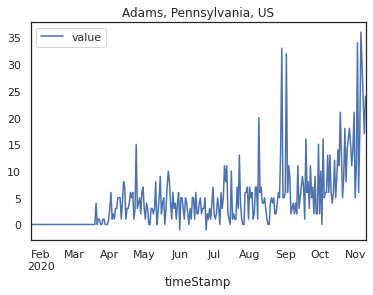

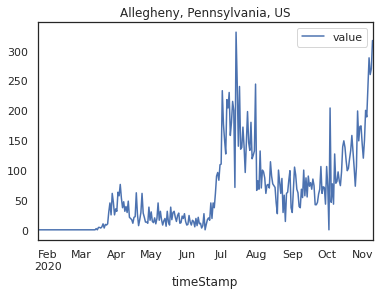

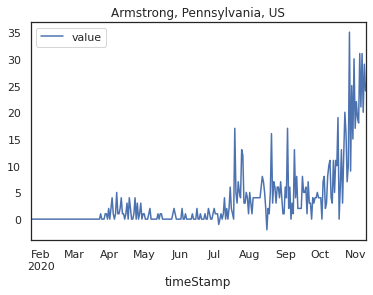

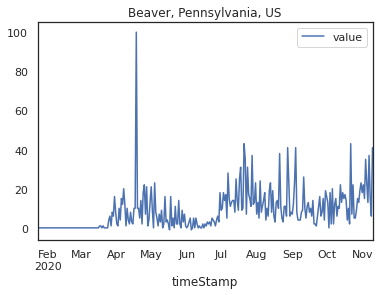

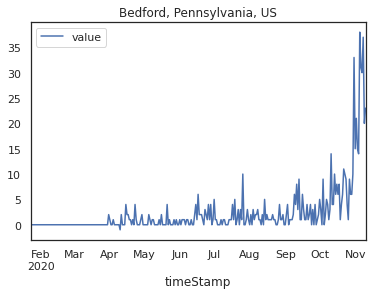

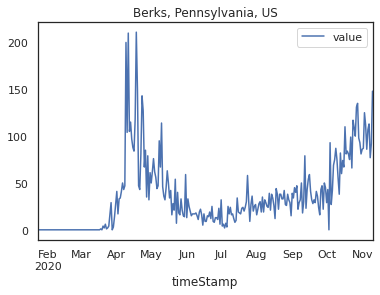

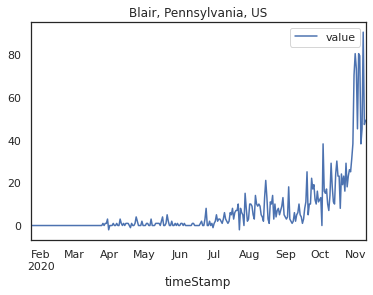

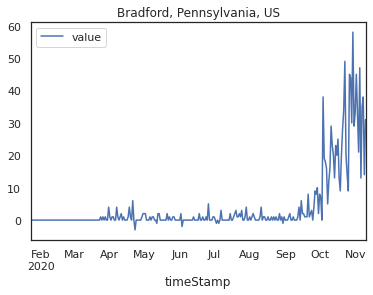

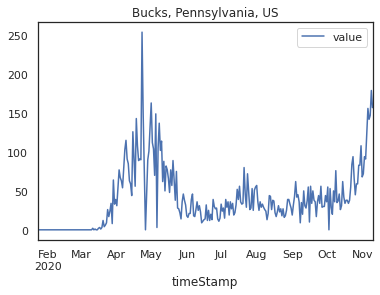

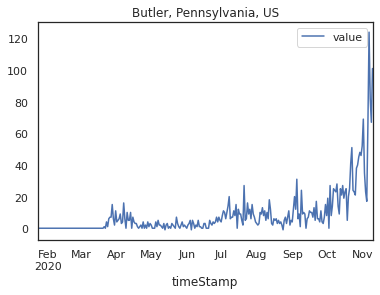

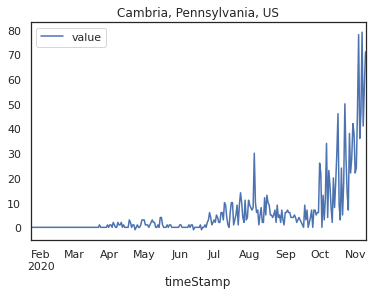

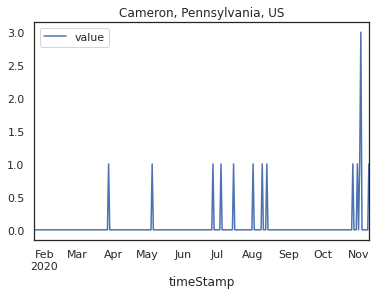

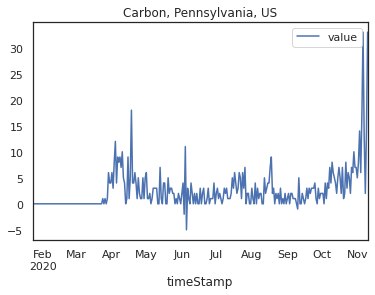

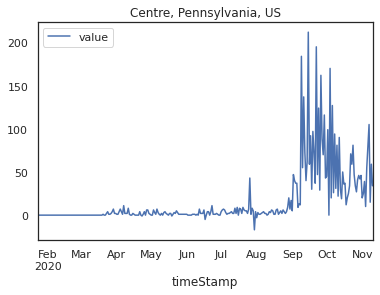

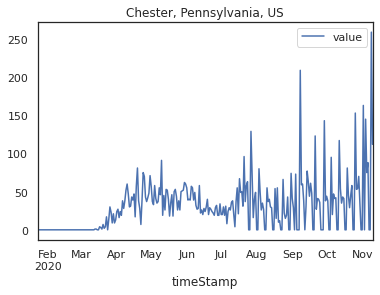

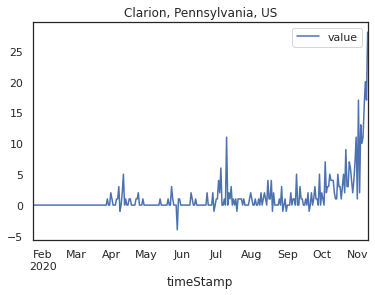

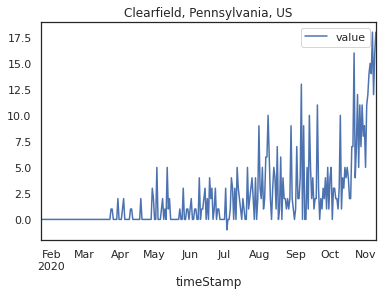

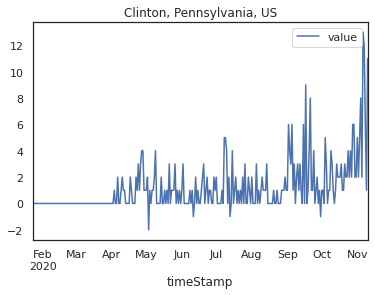

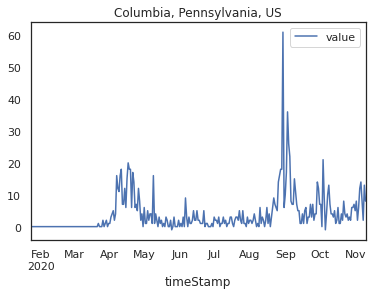

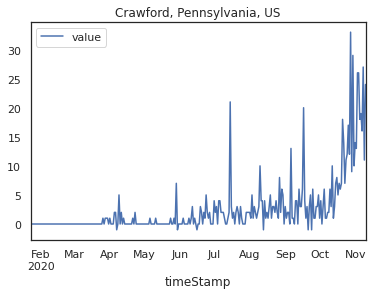

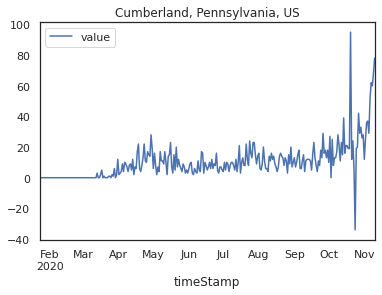

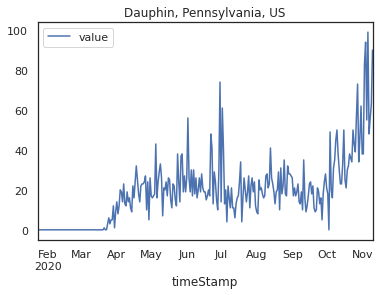

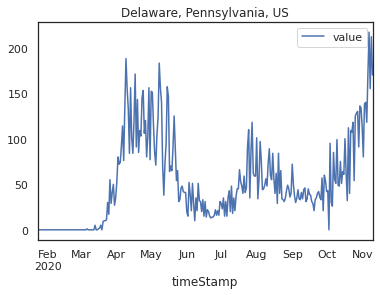

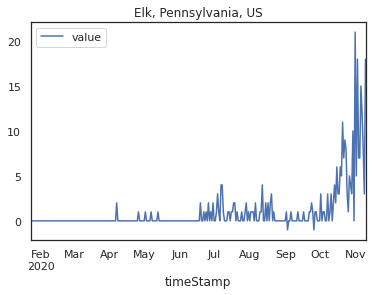

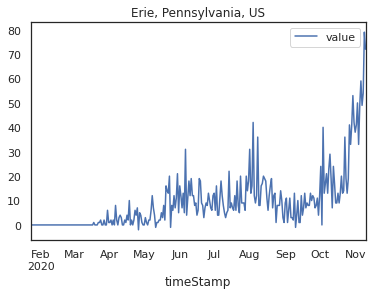

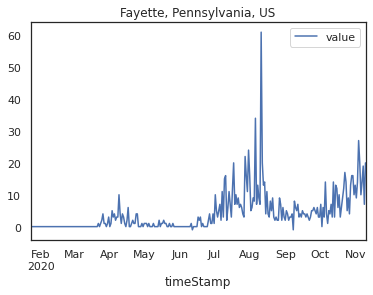

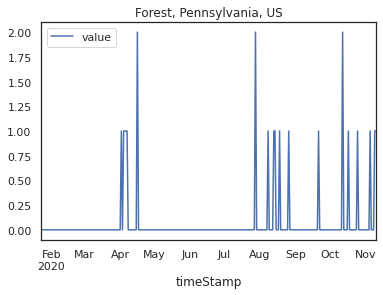

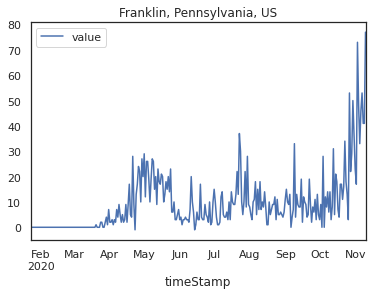

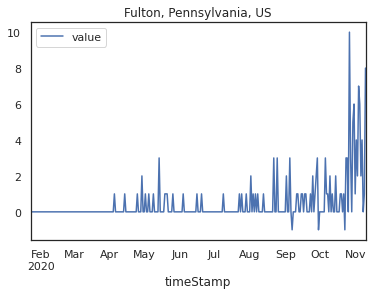

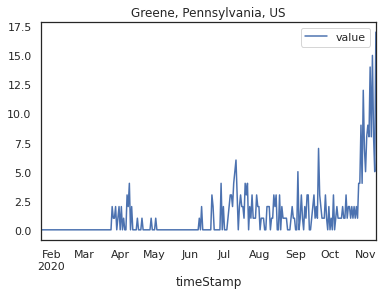

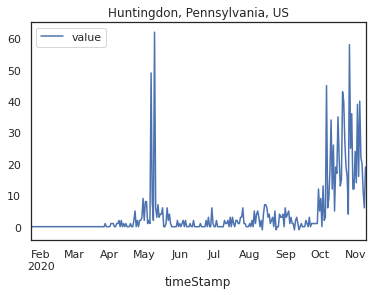

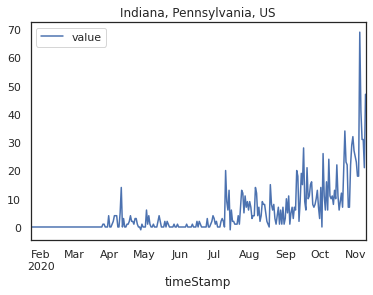

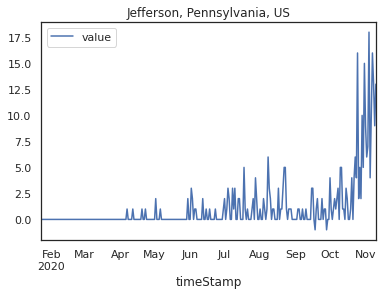

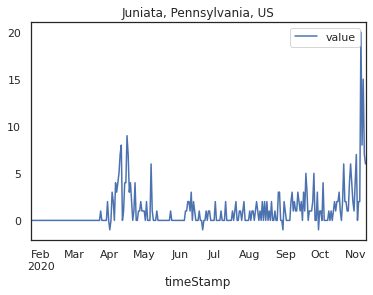

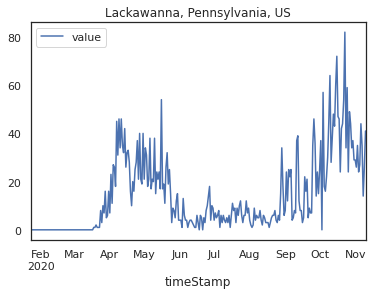

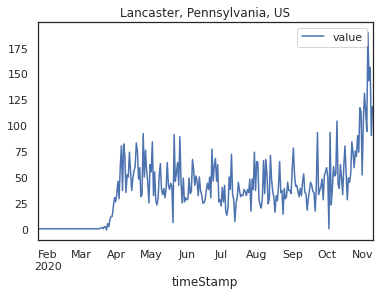

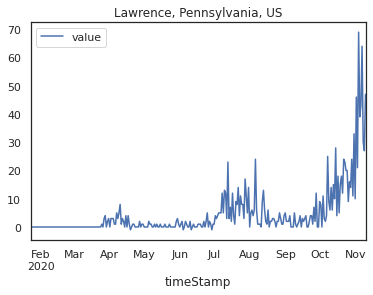

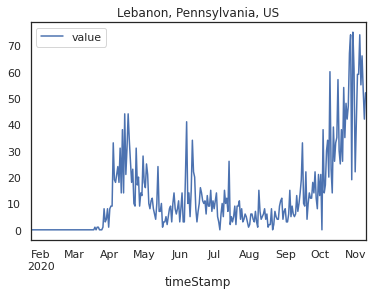

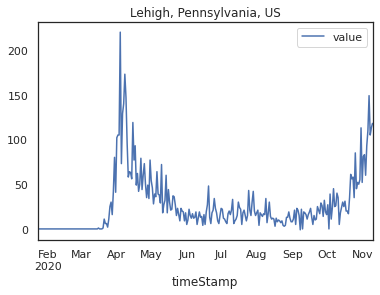

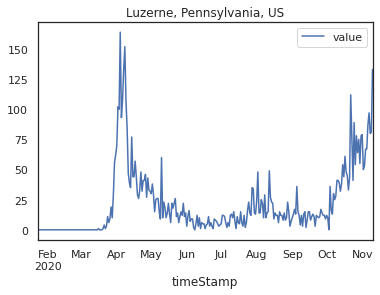

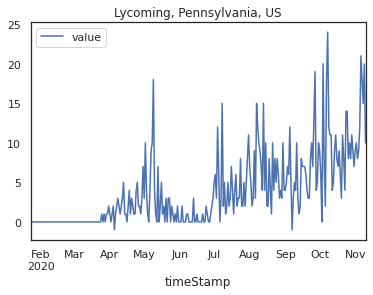

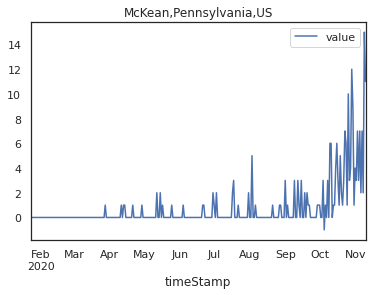

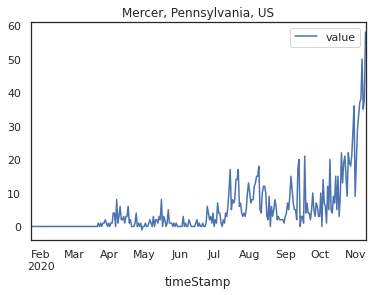

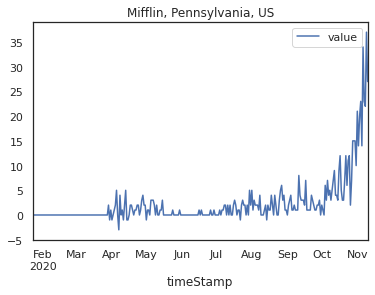

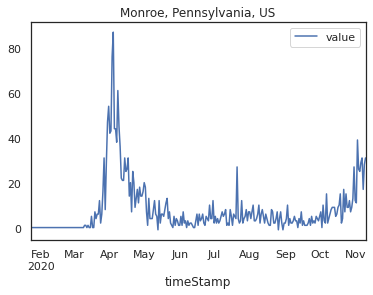

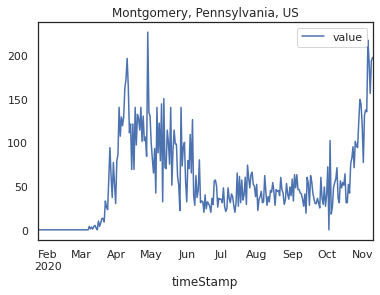

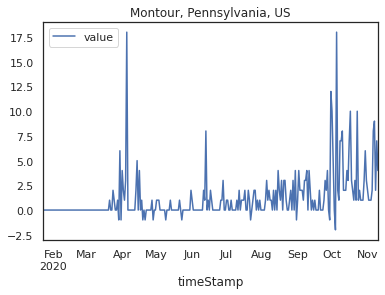

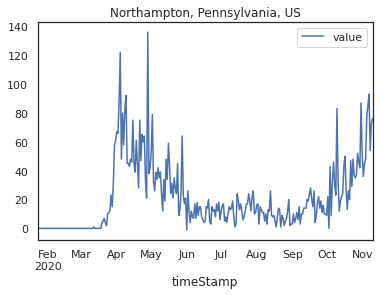

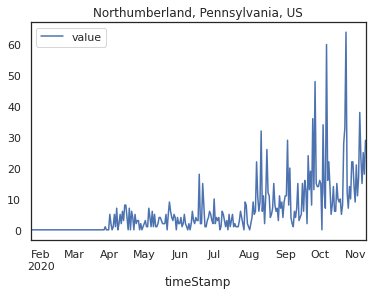

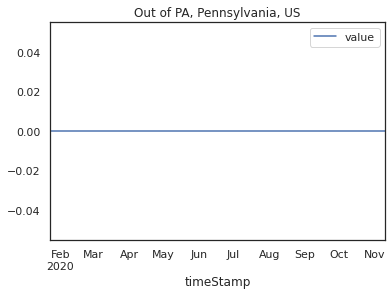

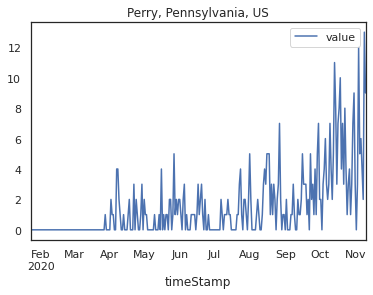

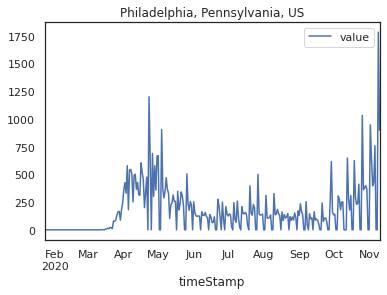

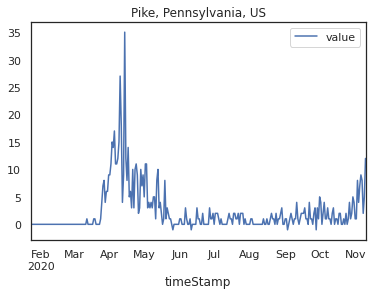

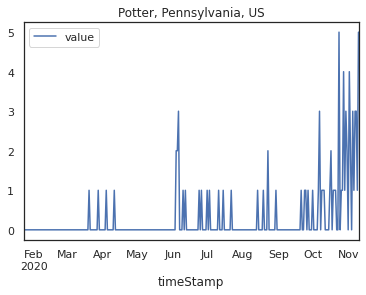

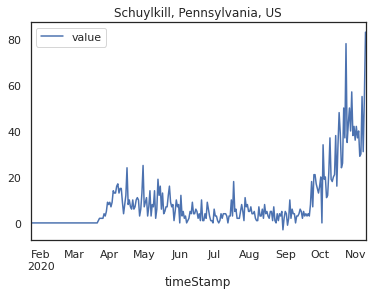

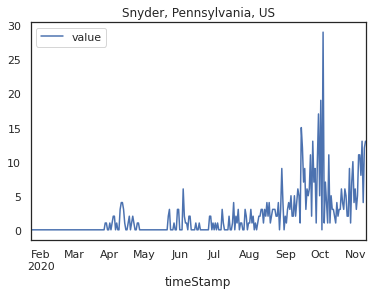

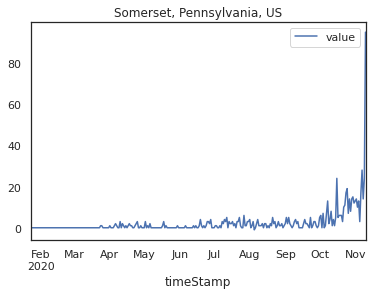

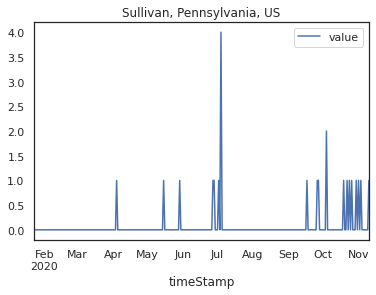

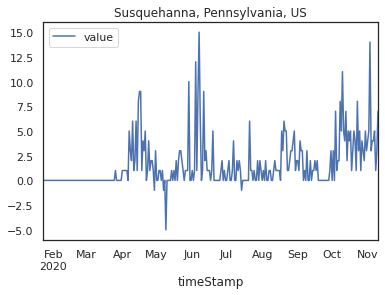

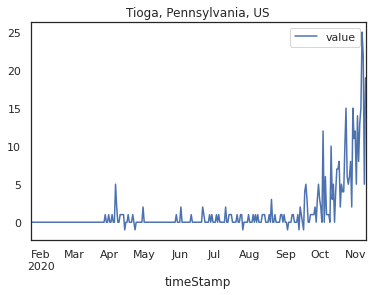

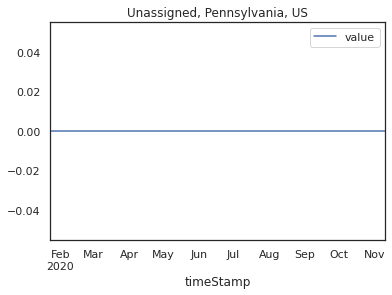

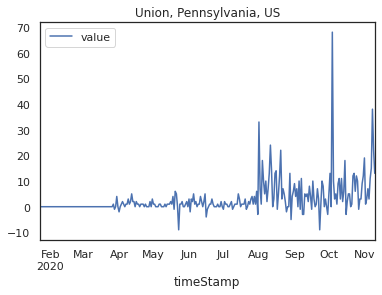

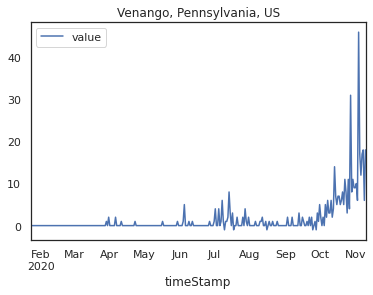

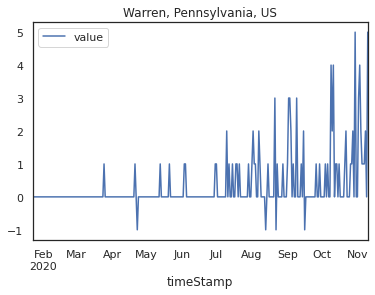

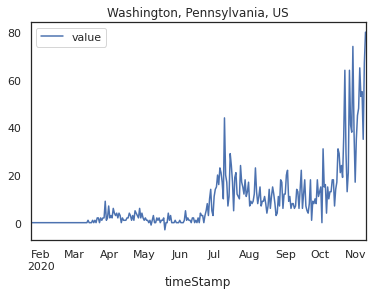

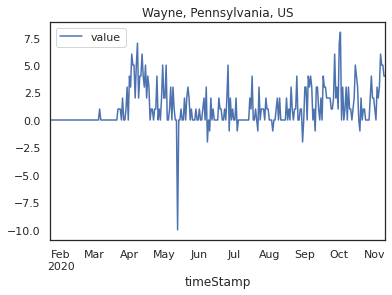

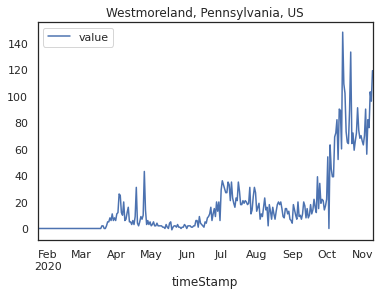

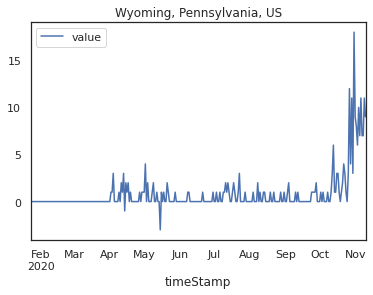

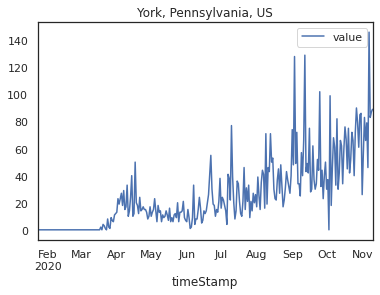

In [ ]:
import matplotlib.pyplot as plt
t = m[(m['Country/Region'].str.find('Pennsylvania',0)!= -1)]
for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)

In [ ]:
delta_days = 20

from datetime import date, timedelta
dt = date.today() - timedelta(delta_days)
dt.strftime("%Y-%m-%d")

'2020-10-22'

In [ ]:
penn = m[m['Country/Region'].str.contains('Pennsylvania', regex=False)]
penn = m
penn = penn[penn['timeStamp'] >= dt.strftime("%Y-%m-%d") ]
penn['timeStamp'].describe()

count                   66800
unique                     20
top       2020-10-28 00:00:00
freq                     3340
first     2020-10-22 00:00:00
last      2020-11-10 00:00:00
Name: timeStamp, dtype: object

In [ ]:

pp = penn.pivot(index='Country/Region', columns='timeStamp', values='value')
#sns.heatmap(pp, annot=True)

In [ ]:
pp.diff(axis=1)

timeStamp,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10
Country/Region,,,,,,,,,,,,,,,,,,,,
"Abbeville, South Carolina, US",NaN,5.0,-4.0,2.0,-1.0,-1.0,2.0,3.0,-1.0,2.0,-8.0,-3.0,1.0,2.0,4.0,-2.0,4.0,-7.0,-2.0,3.0
"Acadia, Louisiana, US",NaN,-25.0,4.0,13.0,-15.0,22.0,-12.0,3.0,0.0,-11.0,13.0,-12.0,107.0,-105.0,15.0,0.0,-18.0,39.0,-38.0,18.0
"Accomack, Virginia, US",NaN,0.0,-2.0,1.0,2.0,-2.0,2.0,-3.0,5.0,-1.0,0.0,-2.0,-2.0,3.0,1.0,-3.0,1.0,-1.0,0.0,-1.0
"Ada, Idaho, US",NaN,-111.0,155.0,-174.0,-22.0,56.0,5.0,39.0,-8.0,38.0,-103.0,-77.0,281.0,-47.0,-81.0,106.0,140.0,-187.0,80.0,-103.0
"Adair, Iowa, US",NaN,3.0,-1.0,3.0,3.0,-2.0,7.0,-8.0,1.0,9.0,-14.0,7.0,10.0,-18.0,5.0,-2.0,1.0,11.0,-8.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yuma, Arizona, US",NaN,21.0,-25.0,26.0,-22.0,-38.0,-5.0,27.0,16.0,71.0,-69.0,-17.0,-17.0,0.0,88.0,-67.0,56.0,28.0,-113.0,137.0
"Yuma, Colorado, US",NaN,-3.0,6.0,-6.0,3.0,-2.0,3.0,-3.0,3.0,0.0,-4.0,0.0,2.0,-1.0,8.0,-5.0,-1.0,-1.0,2.0,-3.0
"Zapata, Texas, US",NaN,0.0,3.0,-2.0,-1.0,6.0,-6.0,0.0,5.0,-4.0,-1.0,0.0,3.0,-3.0,0.0,0.0,5.0,11.0,-16.0,1.0


In [ ]:
t = pp.diff(axis=1).reset_index()
md=pd.melt(t, id_vars=['Country/Region'], value_vars=t.columns[2::])

md.head()

,Country/Region,timeStamp,value
0,"Abbeville, South Carolina, US",2020-10-23,5.0
1,"Acadia, Louisiana, US",2020-10-23,-25.0
2,"Accomack, Virginia, US",2020-10-23,0.0
3,"Ada, Idaho, US",2020-10-23,-111.0
4,"Adair, Iowa, US",2020-10-23,3.0


In [ ]:
r = md.groupby(['Country/Region', pd.Grouper(key='timeStamp', freq='5d')]).describe()
r = r.reset_index()
r.columns = r.columns.get_level_values(0)
new_index = ['Country/Region', 'timeStamp', 'count',	'mean',	'std',	'min',	'25%',	'50%',	'75%',	'max']
r.columns = new_index

r[r['max'] > 100]

,Country/Region,timeStamp,count,mean,std,min,25%,50%,75%,max
6,"Acadia, Louisiana, US",2020-11-02,5.0,1.00,75.561233,-105.0,-12.00,0.0,15.00,107.0
12,"Ada, Idaho, US",2020-10-23,5.0,-19.20,130.765821,-174.0,-111.00,-22.0,56.00,155.0
14,"Ada, Idaho, US",2020-11-02,5.0,36.40,156.741188,-81.0,-77.00,-47.0,106.00,281.0
15,"Ada, Idaho, US",2020-11-07,4.0,-17.50,153.137193,-187.0,-124.00,-11.5,95.00,140.0
32,"Adams, Colorado, US",2020-10-23,5.0,-9.60,126.159819,-159.0,-128.00,32.0,101.00,106.0
...,...,...,...,...,...,...,...,...,...,...
13221,"Wyandotte, Kansas, US",2020-10-28,5.0,10.40,171.217114,-200.0,-109.00,0.0,161.00,200.0
13222,"Wyandotte, Kansas, US",2020-11-02,5.0,-32.20,163.196814,-183.0,-161.00,-97.0,97.00,183.0
13223,"Wyandotte, Kansas, US",2020-11-07,4.0,0.00,127.373467,-156.0,-39.00,0.0,39.00,156.0
13283,"Yavapai, Arizona, US",2020-11-07,4.0,4.25,108.456981,-130.0,-38.50,6.5,49.25,134.0


In [ ]:
r[r['Country/Region']=='Montgomery, Pennsylvania, US']

,Country/Region,timeStamp,count,mean,std,min,25%,50%,75%,max
8196,"Montgomery, Pennsylvania, US",2020-10-23,5.0,4.0,20.161845,-24.0,-5.00,6.0,13.00,30.0
8197,"Montgomery, Pennsylvania, US",2020-10-28,5.0,4.8,22.398661,-24.0,-5.00,-2.0,26.00,29.0
8198,"Montgomery, Pennsylvania, US",2020-11-02,5.0,19.4,49.110080,-43.0,-2.00,6.0,54.00,82.0
8199,"Montgomery, Pennsylvania, US",2020-11-07,4.0,-5.0,32.812599,-37.0,-27.25,-10.0,12.25,37.0


In [ ]:
r.head()

,Country/Region,timeStamp,count,mean,std,min,25%,50%,75%,max
0,"Abbeville, South Carolina, US",2020-07-09,5.0,0.2,4.494441,-6.0,-2.00,1.0,2.00,6.0
1,"Abbeville, South Carolina, US",2020-07-14,5.0,1.0,1.870829,-2.0,1.00,1.0,2.00,3.0
2,"Abbeville, South Carolina, US",2020-07-19,5.0,-0.6,33.679371,-48.0,-4.00,-1.0,3.00,47.0
3,"Abbeville, South Carolina, US",2020-07-24,4.0,-1.0,2.449490,-4.0,-1.75,-1.0,-0.25,2.0
4,"Acadia, Louisiana, US",2020-07-09,5.0,3.6,25.598828,-23.0,-6.00,-1.0,2.00,46.0


In [ ]:
t=md.groupby(['Country/Region', pd.Grouper(key='timeStamp', freq='3d')]).sum()
t=t.reset_index()
total = t.groupby(['Country/Region']).sum().reset_index()
total[total['Country/Region']=='Montgomery, Pennsylvania, US']

,Country/Region,value
2049,"Montgomery, Pennsylvania, US",27.0


In [ ]:
pd.set_option('display.max_rows', 1000)
ts = total.sort_values('value',ascending=False)
ts[ts['value']>100].head(300)

NameError: ignored

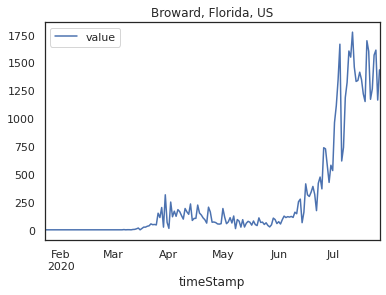

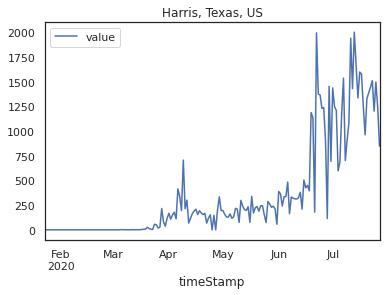

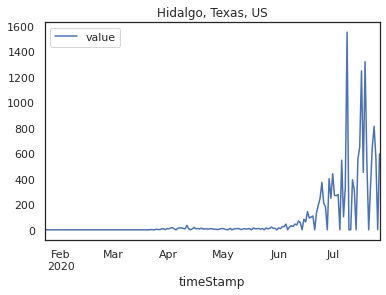

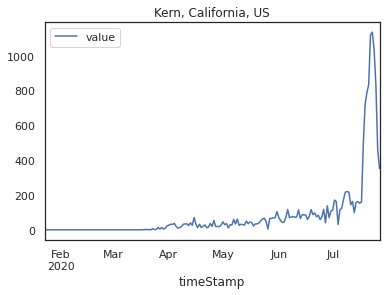

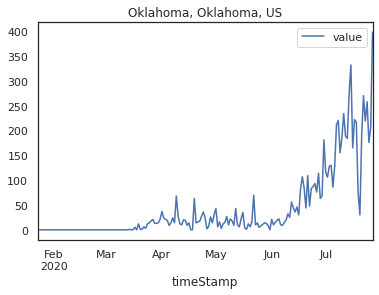

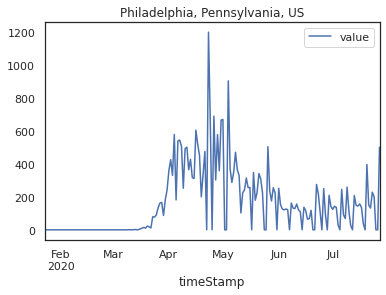

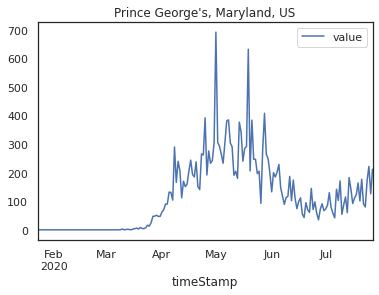

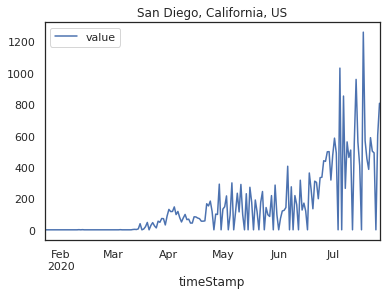

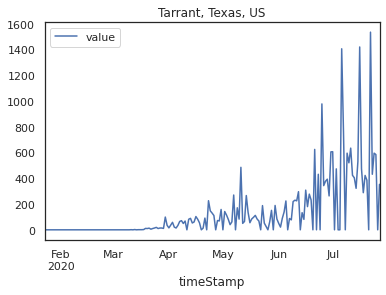

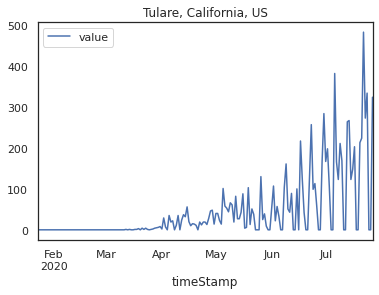

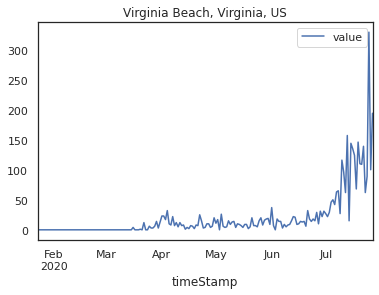

In [ ]:

my_list = ts[ts['value']>100]['Country/Region'].tolist()[0:300]
bad_data = m[m['value']<0]['Country/Region'].unique().tolist()

t=m[m['Country/Region'].isin(my_list)]
t = t[~t['Country/Region'].isin(bad_data)]




t=m[m['Country/Region'].isin(my_list)]
t=t[~t['Country/Region'].isin(bad_data)]

for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)